In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.style as style
from math import sqrt
plt.style.use('fivethirtyeight')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn =ignore_warn #warnings from sklearn and seaborn

In [2]:
column_header = ['age','workclass','fnlwgt','education','education-num', 'marital-status','occupation',
                 'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country',
                 'annual-income']
df_train = pd.read_csv('./data/census-income-1996.csv', names=column_header)
df_test = pd.read_csv('./data/census-income-1996_test.csv', names=column_header)

In [3]:
df_train.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Recode names
df_train.columns = [str.replace('-', '_') for str in df_train.columns]
df_test.columns = [str.replace('-', '_') for str in df_test.columns]

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
annual_income     32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df_train.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df_train.describe(include=[np.object, pd.Categorical])

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,annual_income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [8]:
print('shape before removing duplicate rows:', df_train.shape)
df_train.drop_duplicates()
print('shape after removing duplicate rows:', df_train.shape)

shape before removing duplicate rows: (32561, 15)
shape after removing duplicate rows: (32561, 15)


In [9]:
## check for number of missing values
df_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
annual_income     0
dtype: int64

In [10]:
(df_train.astype(np.object)==' ?').any()

age               False
workclass          True
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation         True
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country     True
annual_income     False
dtype: bool

In [11]:
for col in df_train.columns:
    if df_train[col].dtype == object:
        count = 0
        count = [count + 1 for x in df_train[col] if x == ' ?']
        print(col + ' ' + str(sum(count)))

workclass 1836
education 0
marital_status 0
occupation 1843
relationship 0
race 0
sex 0
native_country 583
annual_income 0


In [12]:
##remove rows with missing values
cols = ['workclass', 'occupation','native_country']
for column in cols:
    df_train.loc[df_train[column] == ' ?', column] = np.nan
    df_train.dropna(axis = 0, inplace = True)
print('shape of after dropping missings values',df_train.shape)

shape of after dropping missings values (30162, 15)


In [13]:
##remove rows with missing values
cols = ['workclass', 'occupation','native_country']
for column in cols:
    df_test.loc[df_test[column] == ' ?', column] = np.nan
    df_test.dropna(axis = 0, inplace = True)
print('shape of after dropping missings values',df_test.shape)

shape of after dropping missings values (15060, 15)


In [14]:
for col in df_test.columns:
    if df_test[col].dtype == object:
        count = 0
        count = [count + 1 for x in df_test[col] if x == ' ?']
        print(col + ' ' + str(sum(count)))

workclass 0
education 0
marital_status 0
occupation 0
relationship 0
race 0
sex 0
native_country 0
annual_income 0


In [15]:
df_train['annual_income'].value_counts(normalize=True) # null accuracy is approximately 76%, we want to improve this result

 <=50K    0.751078
 >50K     0.248922
Name: annual_income, dtype: float64

In [16]:
df_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'annual_income'],
      dtype='object')

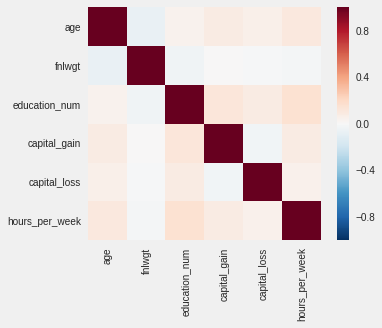

In [17]:
#Heat map
corrmat= df_train.corr()
f, ax =plt.subplots(figsize=(5,4))
sns.heatmap(corrmat, square=True)

In [18]:
cols = ['workclass','education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
for col in cols:
    print(df_train[col].value_counts())
    print()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

 HS-grad         9840
 Some-college    6678
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

 Married-civ-spouse       14065
 Never-married             9726
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: marital_status, dtype: int64

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 O

In [19]:
## correlation among features
df_train.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886
education_num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522
capital_gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432
capital_loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417
hours_per_week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000


In [20]:
## checking for categories
cat_col = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex',
        'native_country']
for cat in cat_col:
    print('Number of unique {}'.format(cat),df_train[cat].nunique())

Number of unique workclass 7
Number of unique education 16
Number of unique marital_status 7
Number of unique occupation 14
Number of unique relationship 6
Number of unique race 5
Number of unique sex 2
Number of unique native_country 41


In [21]:
# unique features from each category
unique_cat_col = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex',
                'native_country', 'annual_income']
for cat in unique_cat_col:
    print(df_train[cat].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' Poland' ' Colu

In [22]:
race = {' White':'White', ' Black':'others', ' Asian-Pac-Islander':'others', ' Amer-Indian-Eskimo':'others', 
        ' Other':'others'}
continents = {' United-States':'North_America', ' Cuba':'North_America', ' Jamaica':'North_America', ' India':'others', 
              ' Mexico':'North_America', ' Puerto-Rico':'North_America',' Honduras':'North_America', ' England':'others', 
              ' Canada':'North_America', ' Germany':'others',' Iran':'others', ' Philippines':'others', ' Poland':'others', 
              ' Columbia':'others', ' Cambodia':'others', ' Thailand':'others', ' Ecuador':'others', 
              ' Laos':'others', ' Taiwan':'others', ' Haiti':'North_America', ' Portugal':'others', ' Dominican-Republic':'North_America',
              ' El-Salvador':'North_America', ' France':'others', ' Guatemala':'North_America', ' Italy':'others', 
              ' China':'others', ' South':'others', ' Japan':'others', ' Yugoslavia':'others',
             ' Peru':'others', ' Outlying-US(Guam-USVI-etc)':'North_America', ' Scotland':'others', 
              ' Trinadad&Tobago':'others',' Greece':'others', ' Nicaragua':'North_America', ' Vietnam':'others',
              ' Hong':'others', ' Ireland':'others', ' Hungary':'others', ' Holand-Netherlands':'others'}
work_cat = {' State-gov':'govt',' Self-emp-not-inc':'others',' Private':'private',' Federal-gov':'govt',
            ' Local-gov':'govt', ' Self-emp-inc':'self_emplyd', ' Without-pay':'others', ' Never-worked':'others'}
edu_level = {' Bachelors':'university', ' HS-grad':'secondary', ' 11th':'secondary', ' Masters' :'university',
             ' 9th': 'primary', ' Some-college':'secondary', ' Assoc-acdm' :'university',
             ' 7th-8th':'primary', ' Doctorate':'university', ' Assoc-voc':'university', 
             ' Prof-school':'university',' 5th-6th':'primary',  ' 10th':'secondary', 
             ' Preschool': 'primary', ' 12th': 'secondary',  ' 1st-4th':'primary'}
marital_status = {' Never-married':'single', ' Married-civ-spouse':'married', ' Divorced':'divorced',
                 ' Married-spouse-absent':'married', ' Separated':'divorced', ' Married-AF-spouse':'married', 
                ' Widowed':'widow'}
occupation = {' Adm-clerical':'unskilled', ' Exec-managerial':'skilled', ' Handlers-cleaners':'unskilled', 
              ' Prof-specialty':'skilled', ' Other-service':'others', ' Sales':'others', ' Transport-moving':'skilled', 
              ' Farming-fishing':'skilled',' Machine-op-inspct':'skilled', ' Tech-support':'skilled', ' Craft-repair':'skilled', 
              ' Protective-serv':'skilled', ' Armed-Forces':'skilled', ' Priv-house-serv':'skilled'}
relationship = {' Not-in-family':'single', ' Husband':'married', ' Wife':'married', ' Own-child':'married', 
                ' Unmarried':'single', ' Other-relative':'others'}
annual_income = {' <=50K':0,' >50K':1}
datasets=[df_train, df_test]
for dataset in datasets:
    dataset['race']=dataset['race'].replace(race)
    dataset['workclass']=dataset['workclass'].replace(work_cat)
    dataset['education']=dataset['education'].replace(edu_level)
    dataset['marital_status']=dataset['marital_status'].replace(marital_status)
    dataset['occupation']=dataset['occupation'].replace(occupation)
    dataset['relationship']=dataset['relationship'].replace(relationship)
    dataset['annual_income']=dataset['annual_income'].replace(annual_income)
    dataset['continent']=dataset['native_country'].replace(continents)

In [23]:
df_train.head(30)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income,continent
0,39,govt,77516,university,13,single,unskilled,single,White,Male,2174,0,40,United-States,0,North_America
1,50,others,83311,university,13,married,skilled,married,White,Male,0,0,13,United-States,0,North_America
2,38,private,215646,secondary,9,divorced,unskilled,single,White,Male,0,0,40,United-States,0,North_America
3,53,private,234721,secondary,7,married,unskilled,married,others,Male,0,0,40,United-States,0,North_America
4,28,private,338409,university,13,married,skilled,married,others,Female,0,0,40,Cuba,0,North_America
5,37,private,284582,university,14,married,skilled,married,White,Female,0,0,40,United-States,0,North_America
6,49,private,160187,primary,5,married,others,single,others,Female,0,0,16,Jamaica,0,North_America
7,52,others,209642,secondary,9,married,skilled,married,White,Male,0,0,45,United-States,1,North_America
8,31,private,45781,university,14,single,skilled,single,White,Female,14084,0,50,United-States,1,North_America
9,42,private,159449,university,13,married,skilled,married,White,Male,5178,0,40,United-States,1,North_America


# Data Visualization

In [24]:
df_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'annual_income', 'continent'],
      dtype='object')

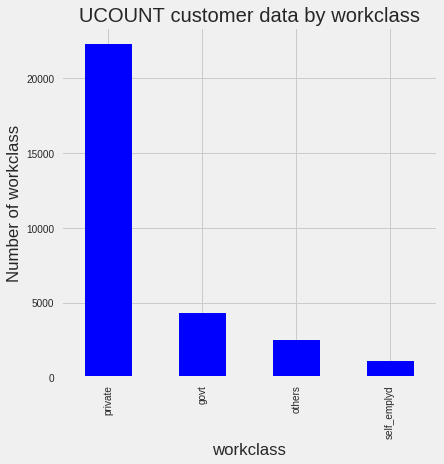

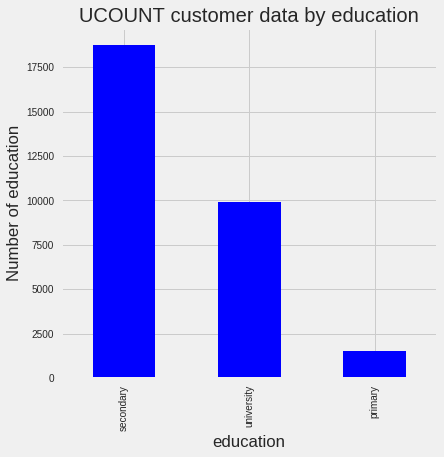

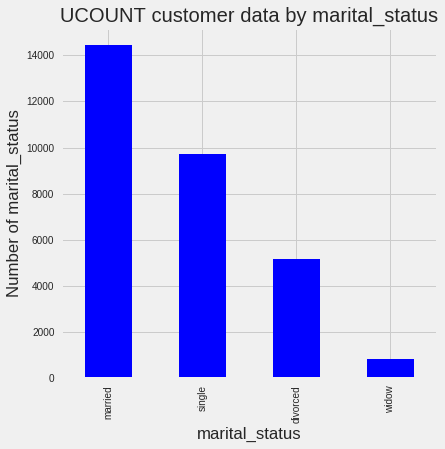

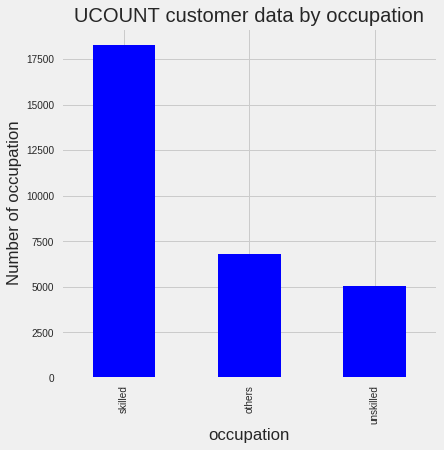

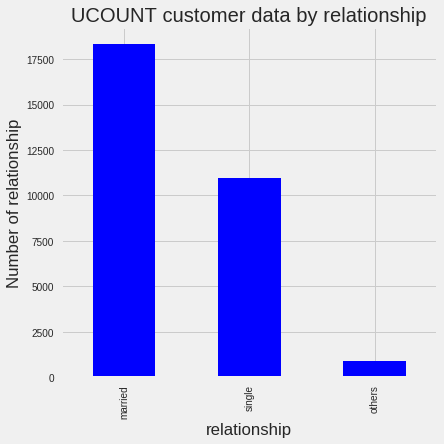

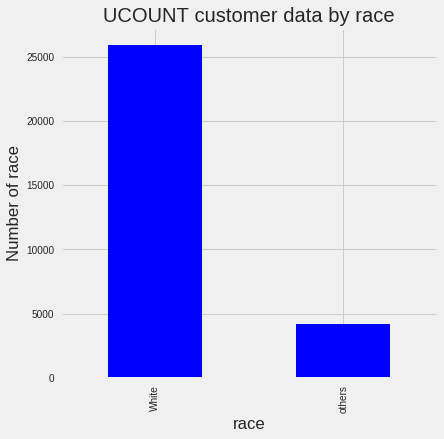

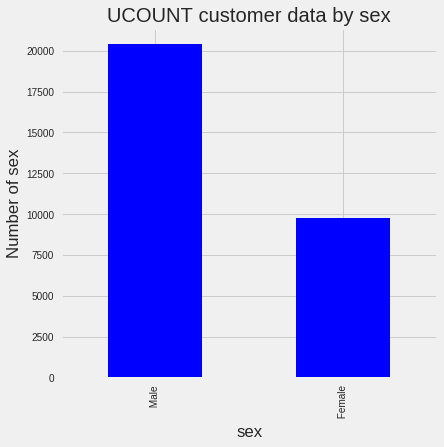

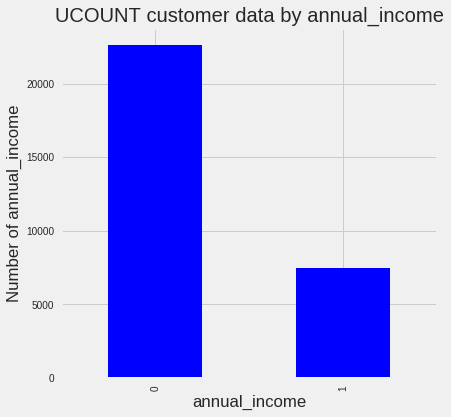

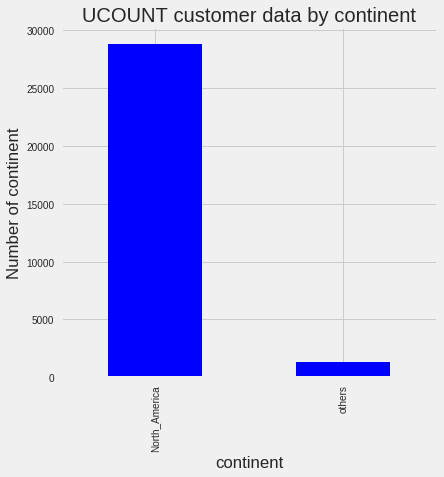

In [25]:
def plot_bars(df_train, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = df_train[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('UCOUNT customer data by ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of ' + col)# Set text for y axis
        plt.show()
        
plot_cols = ['workclass','education','marital_status','occupation','relationship','race', 
             'sex', 'annual_income', 'continent']
plot_bars(df_train, plot_cols)    

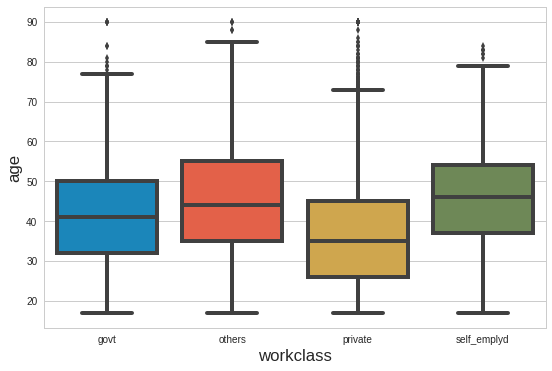

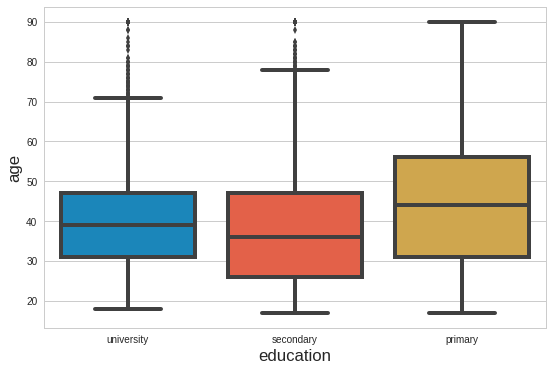

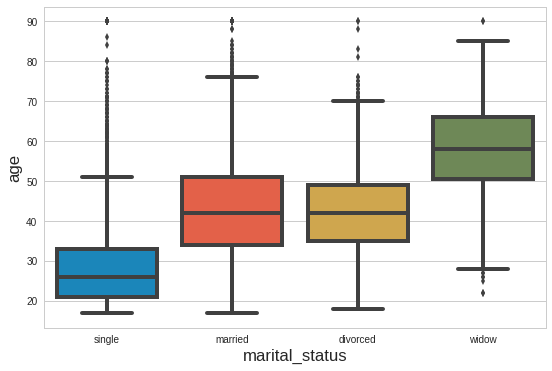

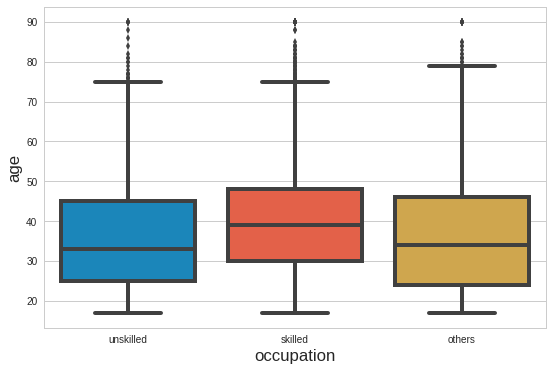

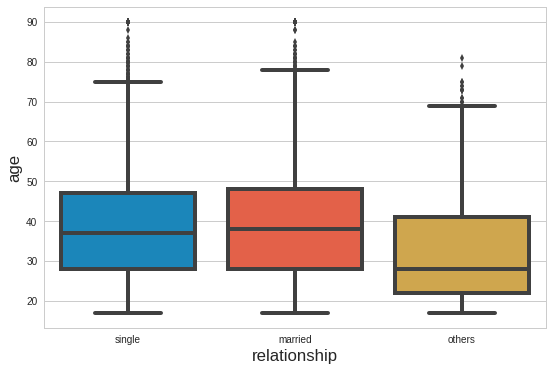

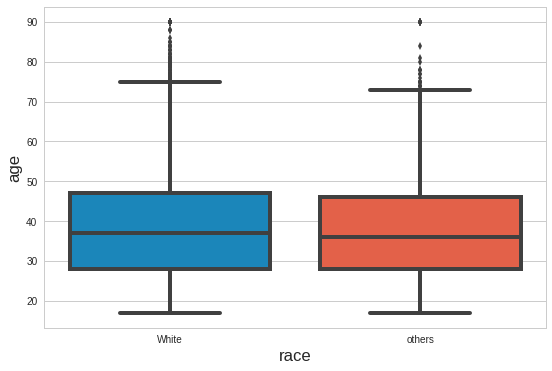

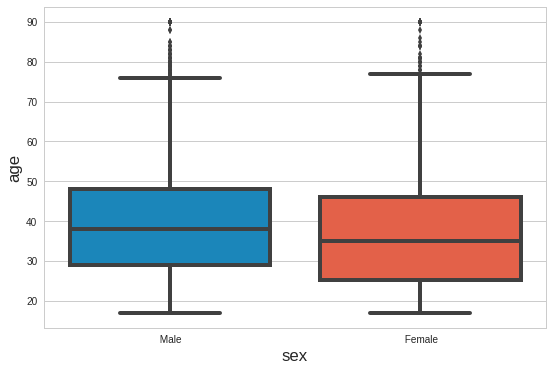

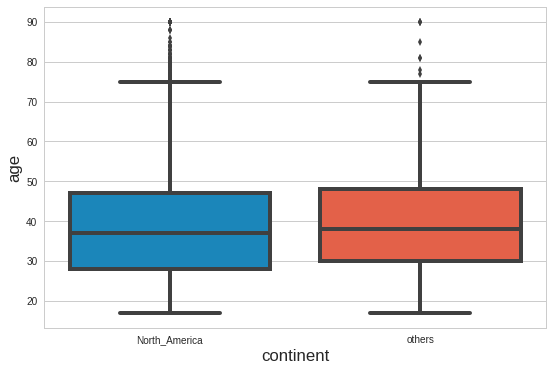

In [26]:
## relationship between the label (numeric variables) and the features (categorical variables)
def plot_box(df_train, cols, col_y = 'age'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=df_train)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

cat_cols = ['workclass','education','marital_status','occupation','relationship','race', 
             'sex','continent']
plot_box(df_train, cat_cols)    

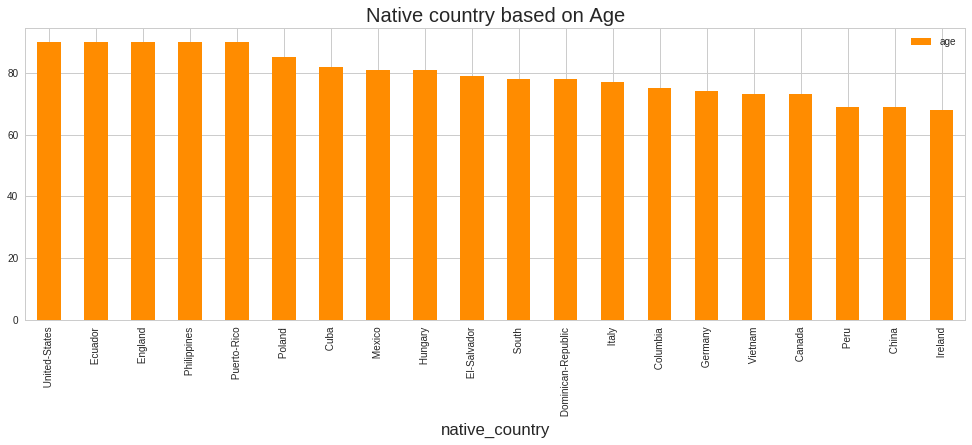

In [27]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

df_train.groupby('native_country')[['age']].max().sort_values(
    'age', ascending=False).head(20).plot.bar(stacked=False, ax=ax, color='darkorange')
ax.set_title('Native country based on Age')

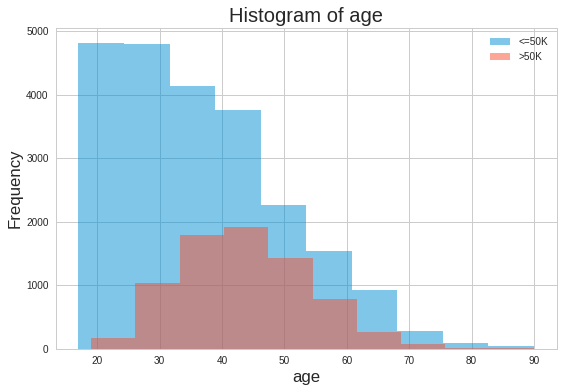

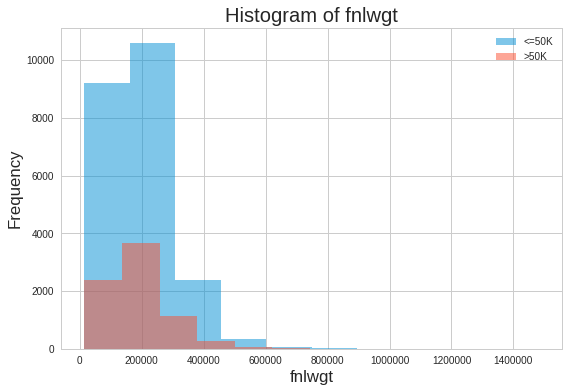

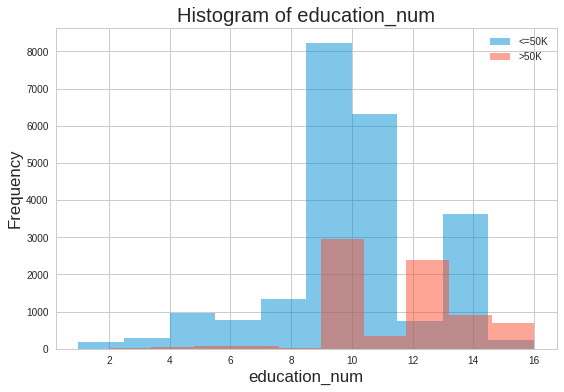

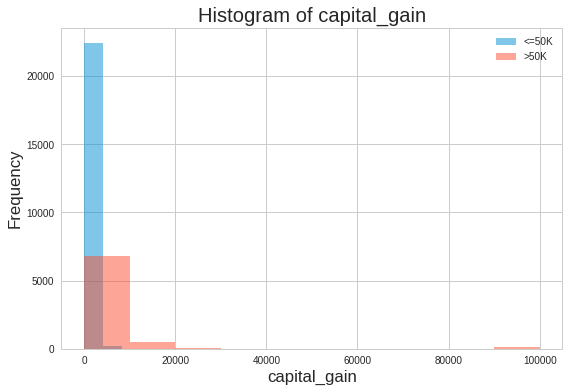

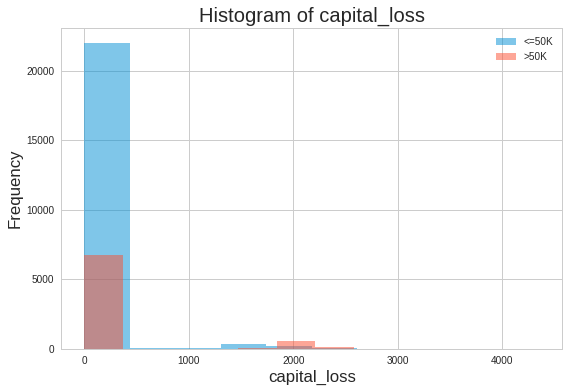

In [28]:
# get a histogram of the YearlyIncome vs target/response variable

cols = ['age', 'fnlwgt','education_num','capital_gain', 'capital_loss']
for col in cols:
    plt.hist(df_train[df_train['annual_income']==0][col], 10, alpha=0.5, label='<=50K')
    plt.hist(df_train[df_train['annual_income']==1][col], 10, alpha=0.5, label='>50K')
    plt.legend(loc='upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Histogram of {}'.format(col))
    plt.show()

In [29]:
df_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'annual_income', 'continent'],
      dtype='object')

In [30]:
train_cols = ['age', 'workclass','education', 'education_num', 'marital_status', 'occupation', 'relationship', 
              'race', 'sex','capital_gain', 'hours_per_week', 'continent', 'annual_income']
test_cols = ['age', 'workclass','education', 'education_num', 'marital_status', 'occupation', 'relationship', 
              'race', 'sex','capital_gain', 'hours_per_week','continent']
train_data = df_train[train_cols]
test_data = df_test[test_cols]

In [31]:
train_data.tail(5)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,hours_per_week,continent,annual_income
32556,27,private,university,12,married,skilled,married,White,Female,0,38,North_America,0
32557,40,private,secondary,9,married,skilled,married,White,Male,0,40,North_America,1
32558,58,private,secondary,9,widow,unskilled,single,White,Female,0,40,North_America,0
32559,22,private,secondary,9,single,unskilled,married,White,Male,0,20,North_America,0
32560,52,self_emplyd,secondary,9,married,skilled,married,White,Female,15024,40,North_America,1


In [32]:
print('shape of train data:',train_data.shape)
print('shape of test data:',test_data.shape)

shape of train data: (30162, 13)
shape of test data: (15060, 12)


In [33]:
## dummify categorical columns
cols = ['workclass','education', 'marital_status','occupation','relationship','race', 'sex','continent']
train = pd.get_dummies(train_data, columns =cols, prefix_sep='__')  # the seperator between the prefix (column name) and cell value
test = pd.get_dummies(test_data, columns =cols, prefix_sep='__')  # the seperator between the prefix (column name) and cell value

In [34]:
train.head(5)

,age,education_num,capital_gain,hours_per_week,annual_income,workclass__govt,workclass__others,workclass__private,workclass__self_emplyd,education__primary,...,occupation__unskilled,relationship__married,relationship__others,relationship__single,race__White,race__others,sex__ Female,sex__ Male,continent__North_America,continent__others
0,39,13,2174,40,0,1,0,0,0,0,...,1,0,0,1,1,0,0,1,1,0
1,50,13,0,13,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,1,0
2,38,9,0,40,0,0,0,1,0,0,...,1,0,0,1,1,0,0,1,1,0
3,53,7,0,40,0,0,0,1,0,0,...,1,1,0,0,0,1,0,1,1,0
4,28,13,0,40,0,0,0,1,0,0,...,0,1,0,0,0,1,1,0,1,0


In [35]:
train.corr()['annual_income']

age                         0.241998
education_num               0.335286
capital_gain                0.221196
hours_per_week              0.229480
annual_income               1.000000
workclass__govt             0.054968
workclass__others           0.024543
workclass__private         -0.117218
workclass__self_emplyd      0.137646
education__primary         -0.103967
education__secondary       -0.248364
education__university       0.304504
marital_status__divorced   -0.155789
marital_status__married     0.436142
marital_status__single     -0.320053
marital_status__widow      -0.059097
occupation__others         -0.108223
occupation__skilled         0.199490
occupation__unskilled      -0.139685
relationship__married       0.294162
relationship__others       -0.084457
relationship__single       -0.269015
race__White                 0.084735
race__others               -0.084735
sex__ Female               -0.216699
sex__ Male                  0.216699
continent__North_America   -0.016880
c

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import sklearn.metrics as sklm
import xgboost as xgb

In [37]:
train.columns

Index(['age', 'education_num', 'capital_gain', 'hours_per_week',
       'annual_income', 'workclass__govt', 'workclass__others',
       'workclass__private', 'workclass__self_emplyd', 'education__primary',
       'education__secondary', 'education__university',
       'marital_status__divorced', 'marital_status__married',
       'marital_status__single', 'marital_status__widow', 'occupation__others',
       'occupation__skilled', 'occupation__unskilled', 'relationship__married',
       'relationship__others', 'relationship__single', 'race__White',
       'race__others', 'sex__ Female', 'sex__ Male',
       'continent__North_America', 'continent__others'],
      dtype='object')

In [38]:
features = ['age', 'education_num', 'capital_gain', 'hours_per_week',
       'workclass__govt', 'workclass__others',
       'workclass__private', 'workclass__self_emplyd', 'education__primary',
       'education__secondary', 'education__university',
       'marital_status__divorced', 'marital_status__married',
       'marital_status__single', 'marital_status__widow', 'occupation__others',
       'occupation__skilled', 'occupation__unskilled', 'relationship__married',
       'relationship__others', 'relationship__single', 'race__White',
       'race__others', 'sex__ Female', 'sex__ Male',
       'continent__North_America', 'continent__others']

In [39]:
predicted_class_name = ['annual_income']
X = train[features].values
y = train[predicted_class_name].values
split_test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = split_test_size, random_state = 42)

In [40]:
print("{0:0.2f}% in training set".format((len(X_train)/len(train.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(train.index)) * 100))

70.00% in training set
30.00% in test set


In [41]:
colu = ['age', 'education_num', 'capital_gain', 'hours_per_week',
       'workclass__govt', 'workclass__others',
       'workclass__private', 'workclass__self_emplyd', 'education__primary',
       'education__secondary', 'education__university',
       'marital_status__divorced', 'marital_status__married',
       'marital_status__single', 'marital_status__widow', 'occupation__others',
       'occupation__skilled', 'occupation__unskilled', 'relationship__married',
       'relationship__others', 'relationship__single', 'race__White',
       'race__others', 'sex__ Female', 'sex__ Male',
       'continent__North_America', 'continent__others']
test1 = test[colu]

In [42]:
print(X_train.shape)
print(test1.shape)

(21113, 27)
(15060, 27)


In [43]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
test1=ss.transform(test1)

In [44]:
reg=LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = reg.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)   

                 Confusion matrix
                 Score positive    Score negative
Actual positive      6318               449
Actual negative      1050              1232

Accuracy        0.83
AUC             0.89
Macro precision 0.80
Macro recall    0.74
 
           Positive      Negative
Num case     6767          2282
Precision    0.86          0.73
Recall       0.93          0.54
F1           0.89          0.62


In [46]:
solution=reg.predict(test1)
#np.savetxt('LogisticRegressionMicrosoft1.csv', solution, delimiter=',')
my_submission=pd.DataFrame({'annual_income': solution})
my_submission.to_csv('LogisticRegression10Academy.csv', index=False)

In [47]:
gbr=GradientBoostingClassifier()
gbr.fit(X_train, y_train.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [48]:
probabilities = gbr.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)  

                 Confusion matrix
                 Score positive    Score negative
Actual positive      6384               383
Actual negative       931              1351

Accuracy        0.85
AUC             0.91
Macro precision 0.83
Macro recall    0.77
 
           Positive      Negative
Num case     6767          2282
Precision    0.87          0.78
Recall       0.94          0.59
F1           0.91          0.67


In [49]:
solution=gbr.predict(test1)
my_submission=pd.DataFrame({'annual_income': solution})
my_submission.to_csv('GradientBoosting10Academy.csv', index=False)
#np.savetxt('GradientBoostingMicrosoft01.csv', solution, delimiter=',')

In [50]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [51]:
probabilities = mlp.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)  

                 Confusion matrix
                 Score positive    Score negative
Actual positive      6232               535
Actual negative       829              1453

Accuracy        0.85
AUC             0.90
Macro precision 0.81
Macro recall    0.78
 
           Positive      Negative
Num case     6767          2282
Precision    0.88          0.73
Recall       0.92          0.64
F1           0.90          0.68


In [52]:
solution=mlp.predict(test1)
my_submission=pd.DataFrame({'annual_income': solution})
my_submission.to_csv('NeuralNetworkClassifier10Academy.csv', index=False)

In [53]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
probabilities = rf.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)  

                 Confusion matrix
                 Score positive    Score negative
Actual positive      6157               610
Actual negative       985              1297

Accuracy        0.82
AUC             0.85
Macro precision 0.77
Macro recall    0.74
 
           Positive      Negative
Num case     6767          2282
Precision    0.86          0.68
Recall       0.91          0.57
F1           0.89          0.62


In [55]:
solution=rf.predict(test1)
my_submission=pd.DataFrame({'annual_income': solution})
my_submission.to_csv('RandomForest10Academy.csv', index=False)

In [56]:
adb=AdaBoostClassifier()
adb.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [57]:
probabilities = adb.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)  

                 Confusion matrix
                 Score positive    Score negative
Actual positive      6378               389
Actual negative      1009              1273

Accuracy        0.85
AUC             0.90
Macro precision 0.81
Macro recall    0.75
 
           Positive      Negative
Num case     6767          2282
Precision    0.86          0.77
Recall       0.94          0.56
F1           0.90          0.65


In [58]:
solution=rf.predict(test1)
my_submission=pd.DataFrame({'annual_income': solution})
my_submission.to_csv('AdaBoost10Academy.csv', index=False)

In [61]:
xgb=xgb.XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [62]:
probabilities = xgb.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)  

                 Confusion matrix
                 Score positive    Score negative
Actual positive      6378               389
Actual negative       933              1349

Accuracy        0.85
AUC             0.91
Macro precision 0.82
Macro recall    0.77
 
           Positive      Negative
Num case     6767          2282
Precision    0.87          0.78
Recall       0.94          0.59
F1           0.91          0.67


In [63]:
solution=xgb.predict(test1)
my_submission=pd.DataFrame({'annual_income': solution})
my_submission.to_csv('xgBoostClassifier10Academy.csv', index=False)